## Sentiment Analysis: Modeling

This project utilizes sentiment analysis to increase your company's success. Sentiment analysis is taking text data and analyzing it to determine whether the emotional tone is positive, negative or neutral. The main objective in this project is to fill the space wheres theres a lack of real time insight into public sentiment on social media platforms.

**Business Problem and Understanding:**

Customer Perception, understanding how our target audience feels about our brand, products, or events is crucial for informed decision-making and strategic planning.
Emerging Trends, without real-time sentiment analysis, we risk missing out on emerging trends and consumer preferences that could shape our future strategies. Marketing Strategy, crafting effective marketing strategies requires a deep understanding of the current sentiment landscape to ensure our messaging aligns with audience expectations.
The solution is real time tweet sentiment analysis.

**Data Sources:**

The dataset is from *kaggle*.

There are *1.6 million* tweets in the dataset.

The data is from the year 2009 in the months April and May.

**Data Preprocessing:** 

To preprocess I used a function to fit the cleaning and preprocessing this dataset of tweets needed. I removed stopwords, lowercased, lemmatized, part of speech tagged and more, with the help of the natural language toolkit. At the end of the preprocessing notebook I converted it to a csv and saved it to the repo. 

**Modeling:**

For the modeling process i had a few baseline models, logistic regression, multinomial naive bayes, and complement naive bayes. I also did random forests, xgboost, and bernoulli naive bayes. I ran a few grid searches to tune hyperparameters on xgboost, logistic regression and bernoulli naive bayes, the model that performed the best after all that was good old logistic regression.

**Evaluation:**

I used the accuracy metric to evaluate the models, since I am interested in how many tweets I classified correctly, I used this metric. 

By addressing this challenge, we not only enhance our understanding of customer perception but also unlock new possibilities for strategic decision-making and business growth.

This is the modeling section of this project, to view the preprocessing and EDA notebooks click [here](https://github.com/nechamab/sentiment_analysis/tree/main/notebooks).

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### Load in data

In [34]:
data = pd.read_csv('../data/data_cleaned.csv',  encoding='latin-1')

([<matplotlib.axis.XTick at 0x7f7160e61430>,
 [Text(0, 0, 'positive'), Text(1, 0, 'negative')])

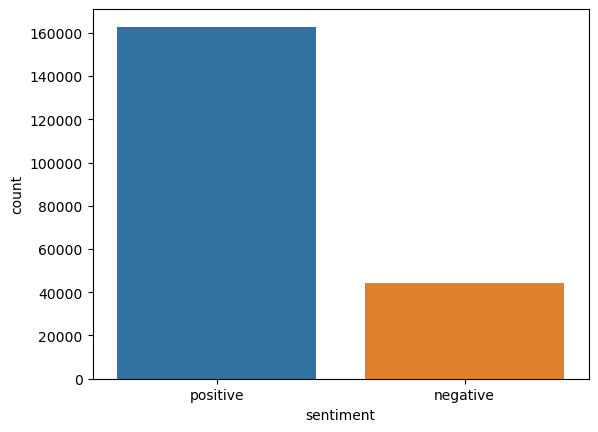

In [35]:
sns.countplot(data = data, x = data['sentiment'])
plt.xticks(ticks = [0, 1], labels=['positive', 'negative'])

There is an class imbalance so after i define X and y i will resample.

### Define X and y

In [36]:
X = data['text']
y = data['sentiment']

### Resampling and Vectorizing

In [5]:
# Convert X to a NumPy array and reshape
X_reshaped = np.array(X).reshape(-1, 1)

# Perform resampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)

# Reshape X_resampled back to a 1D array
X_resampled = X_resampled.ravel()

# Apply vectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_resampled)

I tried to use `min_df` and `max_df` but it just lowered the accuracy score.

([<matplotlib.axis.XTick at 0x7fa9f2496550>,
 [Text(0, 0, 'positive'), Text(1, 0, 'negative')])

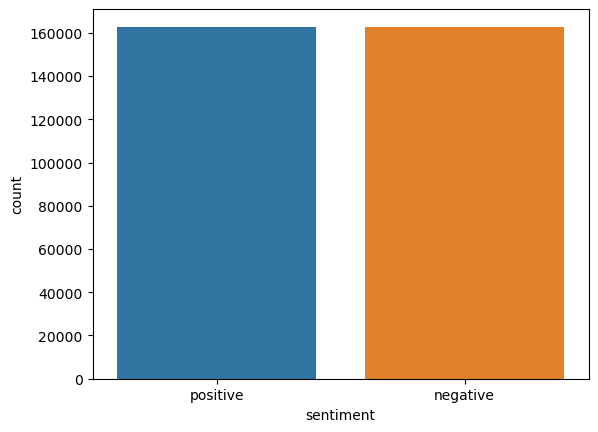

In [6]:
sns.countplot(data = data, x = y_resampled)
plt.xticks(ticks = [0, 1], labels=['positive', 'negative'])

### Infrequent Tokens: dimensionality reduction

In [7]:
# .get_feature_names() attribute useful
tfidf_vec_df = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names())
tfidf_vec_df.head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaaa,...,âµuest,âµã,âº,âºc,âºlitmo,âºmero,âºn,âºsica,âºt,âºâµng
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.sum(X_vectorized, axis = 0)

In [ ]:
tfidf_vec_df.iloc[313].sort_values(ascending=True)[:10]

Now the there are balanced classes and the features are vectorized, i can start modeling.

### Split data train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.3, random_state=42)

### Modeling

#### Multinomial Naive Bayes

In [10]:
multinb = MultinomialNB()
multinb.fit(X_train, y_train)
y_pred_multi_nb = multinb.predict(X_test)
print(classification_report(y_test, y_pred_multi_nb))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     48889
           4       0.76      0.80      0.78     48823

    accuracy                           0.77     97712
   macro avg       0.77      0.77      0.77     97712
weighted avg       0.77      0.77      0.77     97712



#### Complement Naive Bayes

In [11]:
compnb = ComplementNB()
compnb.fit(X_train, y_train)
y_pred_nb = compnb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     48889
           4       0.76      0.80      0.78     48823

    accuracy                           0.77     97712
   macro avg       0.77      0.77      0.77     97712
weighted avg       0.77      0.77      0.77     97712



#### Logistic Regression

In [12]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.76      0.77     48889
           4       0.77      0.80      0.78     48823

    accuracy                           0.78     97712
   macro avg       0.78      0.78      0.78     97712
weighted avg       0.78      0.78      0.78     97712



In [14]:
params = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

gs_log = GridSearchCV(logreg_model,
                 params,
                 scoring = 'accuracy',
                 cv = 3,
                 n_jobs = 1
                 )

In [15]:
# fit train data to gridsearch
gs_log.fit(X_train, y_train)
gs_log.best_params_

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [16]:
log_tuned = LogisticRegression(C=100, class_weight='balanced', penalty='l2', solver='saga')
log_tuned.fit(X_train, y_train)
log_tuned_pred = log_tuned.predict(X_test)
print(classification_report(y_test, log_tuned_pred))

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           0       0.85      0.77      0.81     48889
           4       0.79      0.86      0.82     48823

    accuracy                           0.82     97712
   macro avg       0.82      0.82      0.81     97712
weighted avg       0.82      0.82      0.81     97712



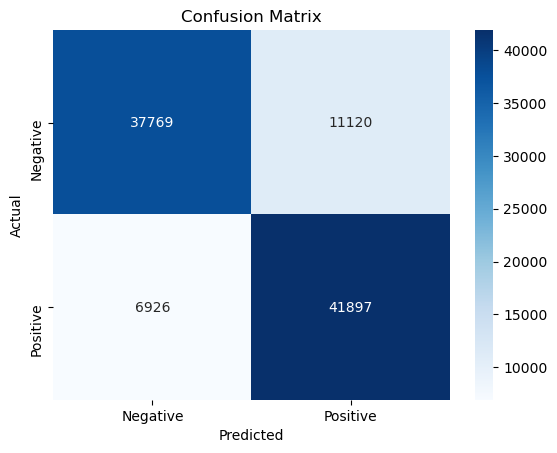

In [24]:
# Calculate confusion matrix
y_pred = log_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('../images/confmatrix')
plt.show()

#### XGBoost

In [26]:
xg = XGBClassifier()

xg.fit(X_train, y_train)

train_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = xg.score(X_train, y_train)
test_accuracy = xg.score(X_test, y_test)
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 75.66%
Validation accuracy: 73.61%


In [17]:
params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 6, 7],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100]
}

gs = GridSearchCV(xg,
                 params,
                 scoring = 'accuracy',
                 cv = 3,
                 n_jobs = 1
                 )

# fit train data to gridsearch
gs.fit(X_train, y_train)
gs.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [ ]:
y_preds = gs.predict(X_test)
test_acc = gs.score(X_test, y_test)
train_acc = gs.score(X_train, y_train)
print(test_acc)
print(train_acc)

In [28]:
xg_tuned = XGBClassifier(learning_rate = 0.2, max_depth = 7, min_child_weight = 1, n_estimators = 100, subsample = 0.7)

xg_tuned.fit(X_train, y_train)

xg_preds = xg_tuned.predict(X_test)

xg_tuned_acc = xg_tuned.score(X_test, y_test)
xg_tuned_acc

0.7310054036351727

#### Bernoulli Naive Bayes

In [60]:
bern_nb = BernoulliNB()
bern_nb.fit(X_train, y_train)
y_pred_nb = bern_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     48889
           4       0.77      0.79      0.78     48823

    accuracy                           0.78     97712
   macro avg       0.78      0.78      0.78     97712
weighted avg       0.78      0.78      0.78     97712



#### Random Forest Classifier

In [61]:
rf = RandomForestClassifier(n_estimators = 120, max_depth = 5)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf.score(X_test, y_test)

0.6903246274766661

In [63]:
param_rf = {
    'max_depth': [5, 8, 10],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [100, 120, 130]
}

gs_rf = GridSearchCV(rf,
                 param_rf,
                 scoring = 'accuracy',
                 cv = 3,
                 n_jobs = 1
                 )

gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 130}

In [64]:
rf_tuned = RandomForestClassifier(n_estimators=130, max_depth=10, min_samples_leaf=3, min_samples_split=3)
rf_tuned.fit(X_train, y_train)

rf_tuned_preds = rf_tuned.predict(X_test)
rf_tuned.score(X_test, y_test)

0.7141088095627968

### Best model (so far): Bernoulli Naive Bayes 78% accuracy

## Final Model: Tuned Logistic Regression